# **Foundation of Machine Learning Course 2023: FaceBook Ad Data Exploration and Modeling**

## Load Required Packages

In [234]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Reading in Data

In [11]:
df = pd.read_csv(r"C:\Users\daniel.s.ross\OneDrive - Accenture Federal Services\Foundations of ML\KAG_conversion_data.csv")
df.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Initial Data Transformation for Regression

We will first select only the relevant features, compute the "Click Rate" variable, then convert age and gender into numerical values

In [12]:
df['click_rate'] = df.apply(lambda x: x.Clicks/x.Impressions, axis = 1)
df_feature = df[["xyz_campaign_id","fb_campaign_id","age","gender","interest","Spent", "click_rate"]]
df_feature = df[["xyz_campaign_id","fb_campaign_id","age","gender","interest","Spent", "click_rate"]]
df_feature.head(5)

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,click_rate
0,916,103916,30-34,M,15,1.43,0.000136
1,916,103917,30-34,M,16,1.82,0.000112
2,916,103920,30-34,M,20,0.00,0.000000
3,916,103928,30-34,M,28,1.25,0.000235
4,916,103928,30-34,M,28,1.29,0.000242


In [53]:
len(df_feature['xyz_campaign_id'].unique())
len(df_feature['fb_campaign_id'].unique())


691

In [13]:
def transform_variables(value):
  """
  This function convert str into numerical values
  """
  if value == 'M':
    return 1
  elif value == 'F':
    return 2
  elif value == '30-34':
    return 1
  elif value == '45-49':
    return 2
  elif value == '35-39':
    return 3
  elif value == '40-44':
    return 4
  else:
    return 0

In [15]:
df_feature['age_num'] = df_feature['age'].apply(lambda x: transform_variables(x))
df_feature['gender_num'] = df_feature['gender'].apply(lambda x: transform_variables(x))
df_feature.head(5)

C:\Users\daniel.s.ross\AppData\Local\Temp\ipykernel_38068\2304706521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature['age_num'] = df_feature['age'].apply(lambda x: transform_variables(x))
C:\Users\daniel.s.ross\AppData\Local\Temp\ipykernel_38068\2304706521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature['gender_num'] = df_feature['gender'].apply(lambda x: transform_variables(x))


,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,click_rate,age_num,gender_num
0,916,103916,30-34,M,15,1.43,0.000136,1,1
1,916,103917,30-34,M,16,1.82,0.000112,1,1
2,916,103920,30-34,M,20,0.00,0.000000,1,1
3,916,103928,30-34,M,28,1.25,0.000235,1,1
4,916,103928,30-34,M,28,1.29,0.000242,1,1


## Train/Validation/Test Split

We want to do an 80/20/20 split

In [247]:
df_feature_refined = df_feature.copy()

In [248]:
df_feature_refined = df_feature_refined.loc[df_feature_refined['click_rate'] < 0.0008]
df_feature_refined = df_feature_refined.loc[(df_feature_refined['click_rate'] != 0) & (df_feature_refined['Spent'] != 0)]

In [249]:
"""
df_feature_refined['lognorm_Spent'] = np.log(df_feature_refined['Spent'])
df_feature_refined['lognorm_Spent'].replace([np.inf, -np.inf], 0, inplace=True)
"""

df_feature_refined['scaled_Spent'] = preprocessing.scale(df_feature_refined['Spent'])
df_feature_refined.head()

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,click_rate,age_num,gender_num,scaled_Spent
0,916,103916,30-34,M,15,1.43,0.000136,1,1,-0.665661
1,916,103917,30-34,M,16,1.82,0.000112,1,1,-0.661434
3,916,103928,30-34,M,28,1.25,0.000235,1,1,-0.667612
4,916,103928,30-34,M,28,1.29,0.000242,1,1,-0.667179
6,916,103940,30-34,M,15,4.77,0.000192,1,1,-0.629462


In [250]:
print(len(df_feature), len(df_feature_refined))

1143 934


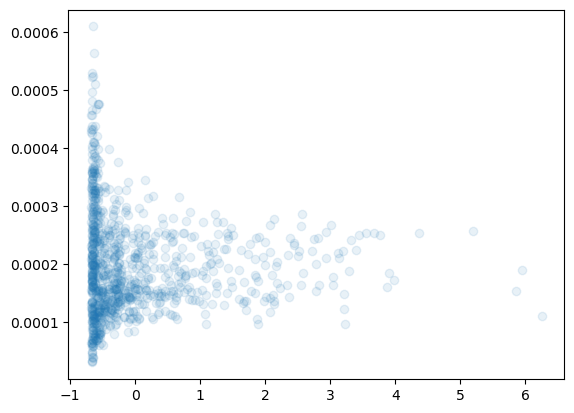

In [251]:
"""
"xyz_campaign_id"
"fb_campaign_id"
"age_num"
"gender_num"
"interest"
"Spent"
"""

plt.scatter(df_feature_refined["scaled_Spent"],df_feature_refined["click_rate"], alpha=0.1)


In [253]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df_feature_refined[[
                                                                        "xyz_campaign_id"
                                                                        #"fb_campaign_id"
                                                                        ,"age_num"
                                                                        ,"gender_num"
                                                                        ,"interest"
                                                                        ,"scaled_Spent"
                                                                        ]],
                                                            df_feature_refined["click_rate"],
                                                            test_size=0.2,
                                                            )

In [254]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.25)

## Train the Model

For this example, we will use a very simple linear regression model

In [255]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Compute Evaluation Metrics

In [256]:
# Compute R-square on the training set
r_sq = model.score(X_train, y_train)

In [257]:
# Make the prediction on the validation set
y_pred = model.predict(X_val)

# Compute MAE
mae = mean_absolute_error(y_val, y_pred)

# Compute RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)

In [258]:
# NO FB_CAMPAIGN_ID and NO OUTLIERS
print('R-squared: ', r_sq, '\n', "Mean Absolute Error: ", mae, '\n', "Root Mean Squared Error: ", rmse)

R-squared:  0.38952862567817925 
 Mean Absolute Error:  4.7930134335432044e-05 
 Root Mean Squared Error:  6.29468972313631e-05


In [182]:

print('R-squared: ', r_sq, '\n', "Mean Absolute Error: ", mae, '\n', "Root Mean Squared Error: ", rmse)

R-squared:  0.1486755873785396 
 Mean Absolute Error:  7.203663721067996e-05 
 Root Mean Squared Error:  9.654344772538231e-05


In [50]:
# ALL FEATURES and ALL DATA
print('R-squared: ', r_sq, '\n', "Mean Absolute Error: ", mae, '\n', "Root Mean Squared Error: ", rmse)

R-squared:  0.146689047017326 
 Mean Absolute Error:  6.8439947986979e-05 
 Root Mean Squared Error:  9.506802270120367e-05


## Model Improvements